# Multispecies Leaf Disease Classification 🍃 
![Python version](https://img.shields.io/badge/python-v3.10-green)

View Dataset

[![View Kaggle Dataset](https://img.shields.io/badge/Kaggle-20BEFF.svg?style=for-the-badge&logo=Kaggle&logoColor=white)](https://www.kaggle.com/datasets/csafrit2/plant-leaves-for-image-classification)

Language & Environments
    
![Python version](https://img.shields.io/badge/Python-3776AB.svg?style=for-the-badge&logo=Python&logoColor=white)
![Anaconda](https://img.shields.io/badge/Anaconda-44A833.svg?style=for-the-badge&logo=Anaconda&logoColor=white)
![Jupyter](https://img.shields.io/badge/Jupyter-F37626.svg?style=for-the-badge&logo=Jupyter&logoColor=white)
    
Packages

![Pandas](https://img.shields.io/badge/pandas-%23150458.svg?style=for-the-badge&logo=pandas&logoColor=white)
![Numpy](https://img.shields.io/badge/NumPy-013243.svg?style=for-the-badge&logo=NumPy&logoColor=white)
![Tensorflow](https://img.shields.io/badge/TensorFlow-FF6F00.svg?style=for-the-badge&logo=TensorFlow&logoColor=white)
![Keras](https://img.shields.io/badge/Keras-D00000.svg?style=for-the-badge&logo=Keras&logoColor=white)

**Authors**

[Eshwaran Venkat](mailto:eshwaran@ischool.berkeley.edu) & [Tigran Poladian](mailto:tpoladian@ischool.berkeley.edu) under [Uri Schonfeld](mailto:shuri@ischool.berkeley.edu)

## Objective 🎯
Train a machine learning model to identify diseased from healthy tree leaves. Initial model will perform a binary healthy / diseased classifier. Follow-on models will add categorical information to identify the species as well as health of the leaves.

## Introduction 📋
* The dataset from Kaggle.com contains images of leaves from 11 species of trees such as `lemon`, `mango`, and `pomegranite`. 
* A total of `4503` jpeg image files at `6k X 4k RGB pixel resolution`
* `2278` healthy leaves and `2225` diseased leaves. 
* The dataset comes decomposed into training, testing, validation, and prediction images, therefore our EDA and model building will not further segregate data into training and other sets. 

The test and training labels are determined by the placement folder for each image file. For example, an image file stored in the folder "Guava diseased" is considered to have binary label = 1 to indicate a diseased leaf image. Based on this file folder location structure, our model will generate a binary label array.

## Preprocessing & EDA 🔭

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
from keras import metrics
from PIL import Image
import cv2

import os
import random

##### Initial baseline model will train and test on the lemon species and before the final project is completed all 11 specifies will be modeled.

In [2]:
#Find image file names from local store directory
# Training files
image_file_names_healthy = os.listdir("D:/MIDS/W207/Project/plant-leaves/Plants_2/train/Lemon healthy (P10a)")
image_file_names_diseased = os.listdir("D:/MIDS/W207/Project/plant-leaves/Plants_2/train/Lemon diseased (P10b)")

image_file_names_test_healthy = os.listdir("D:/MIDS/W207/Project/plant-leaves/Plants_2/test/Lemon healthy (P10a)")
image_file_names_test_diseased = os.listdir("D:/MIDS/W207/Project/plant-leaves/Plants_2/test/Lemon diseased (P10b)") 

# Generate binary image labels: 0 = healthy, 1 = diseased
# Set training values 
image_label = np.zeros(len(image_file_names_healthy) + len(image_file_names_diseased))
image_label[len(image_file_names_healthy):] = 1
# Set test values 
image_label_test = np.zeros(len(image_file_names_test_healthy) + len(image_file_names_test_diseased))
image_label_test[len(image_file_names_test_healthy):] = 1

#print(image_label)


In [52]:
# Load images to memory, healthy images first then diseased images
# Convert to grayscale to minimize processing time
images_training = []
images_test = []

# For grayscale use cv2.IMREAD_GRAYSCALE in imread
for name in image_file_names_healthy:
  im = cv2.imread("D:/MIDS/W207/Project/plant-leaves/Plants_2/train/Lemon healthy (P10a)/" + name)
  images_training.append(cv2.resize(im,(256,256)))
  #images_training.append(im)
                         
  #im = Image.open("D:/MIDS/W207/Project/plant-leaves/Plants_2/train/Lemon healthy (P10a)/" + name)
  #images_training.append(np.array(im.resize((256,256))))
  
  #plt.imshow(im)

for name in image_file_names_diseased:
  im = cv2.imread("D:/MIDS/W207/Project/plant-leaves/Plants_2/train/Lemon diseased (P10b)/" + name)
  images_training.append(cv2.resize(im,(256,256)))
  #images_training.append(im)
    
  #im = Image.open("D:/MIDS/W207/Project/plant-leaves/Plants_2/train/Lemon diseased (P10b)/" + name)
  #images_training.append(np.array(im.resize((256,256))))
  
    
for name in image_file_names_test_healthy:
  im = cv2.imread("D:/MIDS/W207/Project/plant-leaves/Plants_2/test/Lemon healthy (P10a)/" + name)
  images_test.append(cv2.resize(im,(256,256)))
  #images_test.append(im)
    
  #im = Image.open("D:/MIDS/W207/Project/plant-leaves/Plants_2/test/Lemon healthy (P10a)/" + name)
  #images_test.append(np.array(im.resize((256,256))))
  
for name in image_file_names_test_diseased:
  im = cv2.imread("D:/MIDS/W207/Project/plant-leaves/Plants_2/test/Lemon diseased (P10b)/" + name)
  images_test.append(cv2.resize(im,(256,256)))
  #images_test.append(im)
    
  #im = Image.open("D:/MIDS/W207/Project/plant-leaves/Plants_2/test/Lemon diseased (P10b)/" + name)
  #images_test.append(np.array(im.resize((256,256))))

#### For exploratory analysis, display 25 random images from the training set
The images are well centered with the leaf showing prominently at the center against a differentiable background. Prior to training we pass through images through a resizing filter to downsize from 6K x 4K to 256x256.

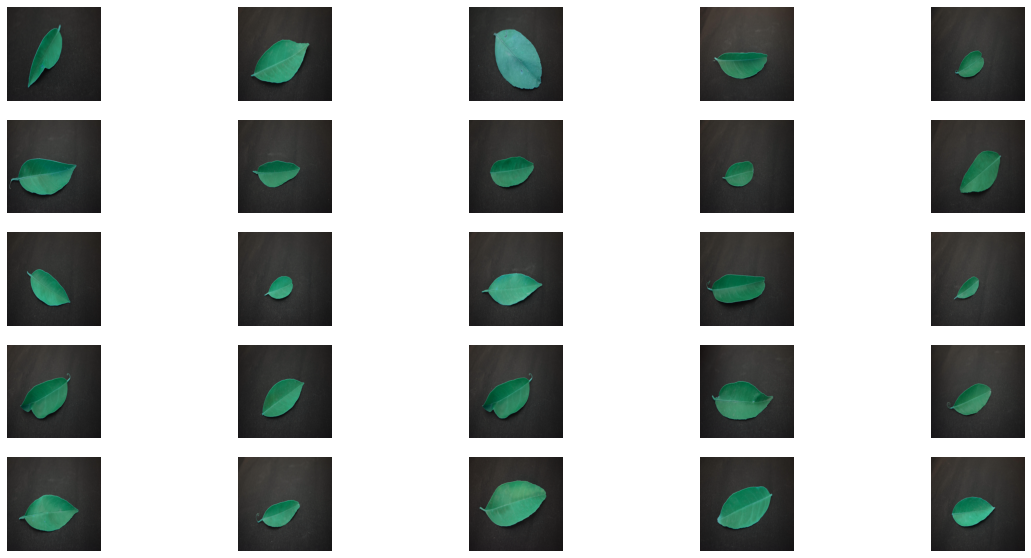

In [53]:
# Display some images
count = len(images_training) - 1

fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(20,10))
for i in range(5):
    for j in range(5):
        indx = random.randint(0,count)
        #print(indx)
        #image = images_training[10]
        #axs[i][j].imshow(image, cmap='gray')
        #axs[i][j].imshow(image)
        axs[i][j].imshow(images_training[indx])
        axs[i][j].axis('off')
plt.show()

In [54]:
def build_model(n_classes=1,
                hidden_layer_sizes=[],
                activation='relu',
                optimizer='SGD',
                learning_rate=0.01):
  """
  Args:
    n_classes: Number of output classes in the dataset.
    hidden_layer_sizes: A list with the number of units in each hidden layer.
    activation: The activation function to use for the hidden layers.
    optimizer: The optimizer to use (SGD, Adam).
    learning_rate: The desired learning rate for the optimizer.

  Returns:
    model: A tf.keras model (graph).
  """
  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(0)

  model = tf.keras.Sequential()

  # INPUT LAYER
  model.add(tf.keras.layers.Flatten())

  # HIDDEN LAYER
  # add as many hidden layer and nodes as called for in the function signature
  for hidden_layer_size in hidden_layer_sizes:
    model.add(tf.keras.layers.Dense(units=hidden_layer_size,
                                    activation=activation,
                                    name='Hidden'+str(hidden_layer_size)))
  
  # OUTPUT LAYER
  model.add(tf.keras.layers.Dense(units=n_classes, activation='sigmoid', name='Output'))

  opti = keras.optimizers.SGD(learning_rate=learning_rate)
    
  if optimizer == 'Adam':
    opti = keras.optimizers.Adam(learning_rate=learning_rate)
  elif optimizer == 'RMSprop':
    opti = keras.optimizers.RMSprop(learning_rate=learning_rate)
    
  model.compile(loss='binary_crossentropy', 
                optimizer=opti, 
                metrics=[tf.keras.metrics.Accuracy(),'Precision','Recall'])
    
  return model

In [59]:
def train_and_evaluate(hidden_layer_sizes=[],
                       activation='tanh',
                       optimizer='Adam',
                       learning_rate=0.01,
                       num_epochs=20,
                       batch_size=32):

  

  # Build the model.
  model = build_model(n_classes=1,
                      hidden_layer_sizes=hidden_layer_sizes,
                      activation=activation,
                      optimizer=optimizer,
                      learning_rate=learning_rate)

  X_train = np.array(images_training)
  #X_train = images_training
  Y_train = image_label
   
  X_test = np.array(images_test)
  #X_test = images_test
  Y_test = image_label_test
    
  # Train the model.
  print('Training...')
  history = model.fit(
    x=X_train,
    y=Y_train,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_split=0,
    verbose=0)
        
  # Retrieve the training metrics (after each train epoch) and the final test
  # accuracy.
  #history = pd.DataFrame(history.history)
  #display(history)
    
  train_accuracy = history.history['accuracy']
  #val_accuracy = history.history['val_accuracy']
  train_recall = history.history['recall']
  train_precision = history.history['precision']
  plt.plot(train_accuracy, label='train_accuracy')
  #plt.plot(val_accuracy, label='validation accuracy')
  plt.plot(train_recall, label='train_recall')
  plt.plot(train_precision, label='train_precision')
  plt.xticks(range(num_epochs))
  plt.xlabel('Train epochs')
  plt.legend()
  plt.show()

  model.summary()

  test_accuracy = 0
  test_accuracy = model.evaluate(x=X_test, y=Y_test, verbose=0,
                                 return_dict=True)['accuracy']
  return test_accuracy



Training...


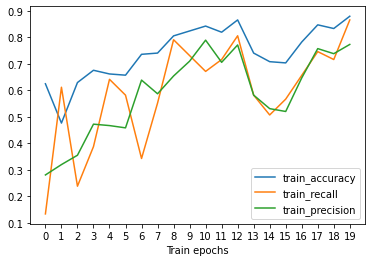

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 786432)            0         
                                                                 
 Output (Dense)              (None, 1)                 786433    
                                                                 
Total params: 786,433
Trainable params: 786,433
Non-trainable params: 0
_________________________________________________________________
Test Accuracy: 0.6000


In [60]:
print('Test Accuracy: %1.4f' %train_and_evaluate())
#print(images_training)

### Baseline Results
For a simple NN binary classifier, we look at accuracy, recall and precision metrics across epochs. This seemed reasonable for a simple model to assess performance across epochs. We achieve an accuracy of 0.6. This could be a consequence of information loss from resizing images to 256x256 although also ran the model at 512x512 resolution without improvement in the performance therefore will proceed with 256x, lower resolution but faster performance. The accuracy varies from 0.5 to 0.8 across multiple runs and would have expected more consistency. This may indicate a problem with the baseline model. Runninc more epochs ( > 15) gives a more consistent 0.6 accuracy.